## Import


In [ ]:
! pip install pyxlsb

In [ ]:
import pandas as pd
import pyxlsb
from datetime import datetime

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
file_path = '/content/drive/MyDrive/STC tv/STC TV Dataset T1.xlsb'

df = pd.read_excel(file_path, engine='pyxlsb')

## 1- Copy the dataframe

In [ ]:
stc = df.copy()

## Preprocessing

In [ ]:
stc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 13 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   Column1           1048575 non-null  int64 
 1   date_             1048575 non-null  int64 
 2   user_id_maped     1048575 non-null  int64 
 3   program_name      1048575 non-null  object
 4   duration_seconds  1048575 non-null  int64 
 5   program_class     1048575 non-null  object
 6   season            1048575 non-null  int64 
 7   episode           1048575 non-null  int64 
 8   program_desc      1034537 non-null  object
 9   program_genre     1048575 non-null  object
 10  series_title      1048575 non-null  int64 
 11  hd                1048575 non-null  int64 
 12  original_name     1048575 non-null  object
dtypes: int64(8), object(5)
memory usage: 104.0+ MB


In [ ]:
stc.shape

(1048575, 13)

In [ ]:
stc.describe()

,Column1,date_,user_id_maped,duration_seconds,season,episode,series_title,hd
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,6.281730e+05,4.301202e+04,1.709266e+04,1.230957e+03,1.342139e+00,6.157952e+00,1.205922e-02,3.862728e-01
std,3.597041e+05,1.242834e+02,1.003513e+04,6.821058e+03,2.104095e+00,1.222015e+01,1.091504e-01,4.868946e-01
min,1.000000e+00,4.280800e+04,1.000000e+00,2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.180660e+05,4.289600e+04,8.253000e+03,5.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.303550e+05,4.302200e+04,1.714900e+04,1.190000e+02,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
75%,9.398225e+05,4.312100e+04,2.566500e+04,1.328000e+03,1.000000e+00,9.000000e+00,0.000000e+00,1.000000e+00
max,1.247852e+06,4.322000e+04,3.428000e+04,1.461329e+06,2.300000e+01,2.820000e+02,1.000000e+00,1.000000e+00


In [ ]:
stc.describe(include='O').T


,count,unique,top,freq
program_name,1048575,8270,The Boss Baby,23625
program_class,1048575,2,SERIES/EPISODES,560174
program_desc,1034537,11176,Animation MovieThe Boss Baby (HD),23625
program_genre,1048575,16,Animation,401730
original_name,1048575,1795,Friends,32997


### modify the date format from numbers to datetime

In [ ]:
# modify the date format from numbers to datetime
def floatHourToTime(fh):
    h = int(fh)
    m = int((fh - h) * 60)
    s = int(((fh - h) * 60 - m) * 60)
    return h, m, s

def convert_excel_date_to_datetime(df, date_column_name):

    def excel_date_to_datetime(excel_date):

        dt = datetime.fromordinal(datetime(1900, 1, 1).toordinal() + int(excel_date) - 2)
        hour, minute, second = floatHourToTime(excel_date % 1) # Call the floatHourToTime function
        return dt.replace(hour=hour, minute=minute, second=second)

    df[date_column_name] = df[date_column_name].apply(excel_date_to_datetime)


# Assuming you have a DataFrame `df` with a column named 'date_' containing Excel serial dates
convert_excel_date_to_datetime(stc, 'date_')

# Now the 'date_' column should contain datetime objects
print(stc['date_'].head())  # Check the converted values

0   2017-05-27
1   2017-05-21
2   2017-08-10
3   2017-07-26
4   2017-07-07
Name: date_, dtype: datetime64[ns]


In [ ]:
# drop unnecessary column
stc = stc.drop('Column1', axis=1)

In [ ]:
stc.head()

,date_,user_id_maped,program_name,duration_seconds,program_class,season,episode,program_desc,program_genre,series_title,hd,original_name
0,2017-05-27,26138,100 treets,40,MOVIE,0,0,Drama Movie100 Streets,Drama,0,0,100 treets
1,2017-05-21,7946,Moana,17,MOVIE,0,0,Animation MovieMoana (HD),Animation,0,1,Moana
2,2017-08-10,7418,The Mermaid Princess,8,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
3,2017-07-26,19307,The Mermaid Princess,76,MOVIE,0,0,Animation MovieThe Mermaid Princess (HD),Animation,0,1,The Mermaid Princess
4,2017-07-07,15860,Churchill,87,MOVIE,0,0,Biography MovieChurchill (HD),Biography,0,1,Churchill


### Cleaning
- removing the spaces between program names
- convert the datatype from int64 to string -->(Seasons-Episodes)

In [ ]:
stc.loc[stc['program_class']=='SERIES/EPISODES', 'program_name'] = stc['program_name']+'_S'+ stc['season'].astype(str) + 'E'+ stc['episode'].astype(str)

In [ ]:
stc['program_name'].head(30)

,program_name
0,100 treets
1,Moana
2,The Mermaid Princess
3,The Mermaid Princess
4,Churchill
5,Beavis And Butt-Head Do America
6,The Mermaid Princess
7,Coco
8,Kidnap
9,The Accountant


## 2- Total views for each

In [ ]:
stc_views_table = stc.groupby(['program_name', 'program_class']).agg({'user_id_maped': [('#user', 'nunique'), ('total_user', 'count')], 'duration_seconds': [('views_in_sec', 'sum')]}).reset_index()

In [ ]:
stc_views_table.columns = ['program_name', 'program_class', '#user', 'total_user', 'views_in_sec']
stc_views_table.head()

,program_name,program_class,#user,total_user,views_in_sec
0,#FollowFriday,MOVIE,59,75,38212
1,#FollowFriday,MOVIE,273,435,153557
2,10 Days in a Madhouse,MOVIE,301,553,356806
3,100 treets,MOVIE,37,46,7732
4,100 treets,MOVIE,677,1805,311268


In [ ]:
stc_views_table['views_in_hours'] = stc_views_table['views_in_sec']/3600
stc_views_table = stc_views_table.drop(columns='views_in_sec')
stc_views_table

,program_name,program_class,#user,total_user,views_in_hours
0,#FollowFriday,MOVIE,59,75,10.614444
1,#FollowFriday,MOVIE,273,435,42.654722
2,10 Days in a Madhouse,MOVIE,301,553,99.112778
3,100 treets,MOVIE,37,46,2.147778
4,100 treets,MOVIE,677,1805,86.463333
...,...,...,...,...,...
11609,iCarly iWant More Viewers _S1E3,SERIES/EPISODES,76,217,47.981389
11610,iCarly iWill Date Freddie _S1E8,SERIES/EPISODES,61,183,82.028056
11611,xXx,MOVIE,58,94,16.795833
11612,xXx: Return of Xander Cage,MOVIE,99,152,37.732222


## 3- Best 10 views

In [ ]:
# Top 10 programs
top10 = stc_views_table.sort_values(by='views_in_hours', ascending=False).head(10)
top10

,program_name,program_class,#user,total_user,views_in_hours
9858,The Boss Baby,MOVIE,3348,23625,2889.027778
9916,The Expendables,MOVIE,853,2119,1961.159444
7085,Moana,MOVIE,2112,7521,1540.544444
10868,Trolls,MOVIE,2584,13609,1512.580278
1659,Bean,MOVIE,949,3617,1423.955000
10476,The murfs,MOVIE,726,2438,1190.363889
9758,The Amazing pider-Man,MOVIE,650,1679,1157.005833
2560,Cloudy With a Chance of Meatballs,MOVIE,683,2076,948.674722
5009,Hotel Transylvania,MOVIE,375,1387,905.437778
9760,The Amazing pider-Man,MOVIE,443,1087,782.467500


## 4- Movies & Series user experience

In [ ]:
# Movies & Series user experience
user_experience = stc.groupby(['program_class']).agg({'user_id_maped': [('#user','nunique'),('total_user','count')],'duration_seconds': [('views_in_sec', 'sum')]}).reset_index()
user_experience.columns = ['program_class', '#user', 'total_user', 'views_in_sec']
user_experience['views_in_hours'] = (user_experience['views_in_sec']/3600).round(2)
user_experience = user_experience.drop(columns='views_in_sec')
user_experience

,program_class,#user,total_user,views_in_hours
0,MOVIE,11355,488401,103444.15
1,SERIES/EPISODES,3901,560174,255097.79


In [ ]:
sum = 88585+959990
sum

1048575

## 5- Visualization the previoes

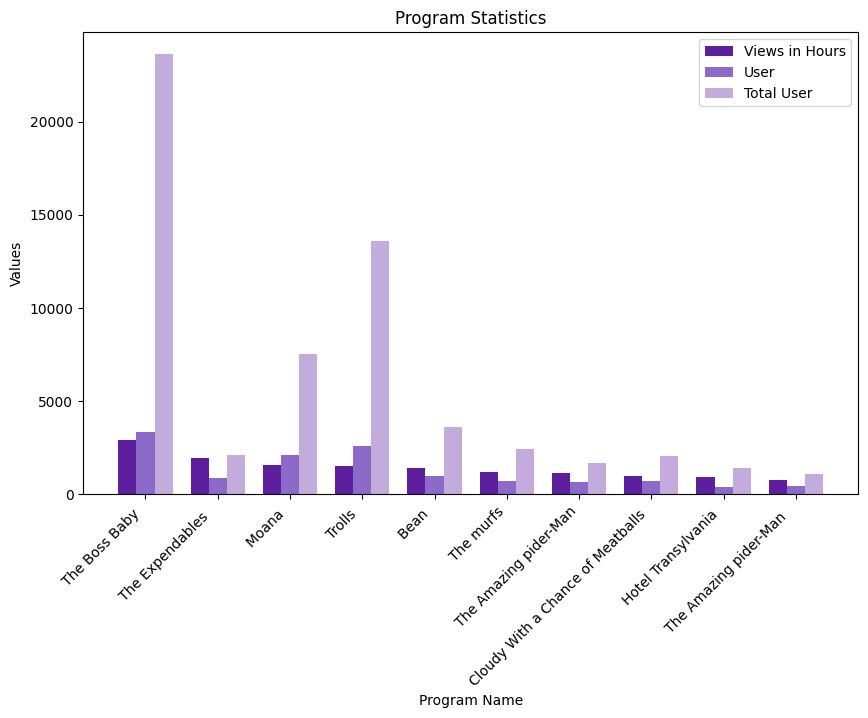

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Define the positions for the groups of bars
bar_width = 0.25
index = np.arange(len(top10['program_name']))

# Create the plot with transparent background
fig, ax1 = plt.subplots(figsize=(10, 6))

# Set the figure and axes backgrounds to be transparent
fig.patch.set_facecolor('none')
ax1.patch.set_facecolor('none')

# Plot each bar group with colors inspired by the image
bars1 = ax1.bar(index, top10['views_in_hours'], bar_width, label='Views in Hours', color='#5e1f9f')  # Dark purple
bars2 = ax1.bar(index + bar_width, top10['#user'], bar_width, label='User', color='#8c6ac9')         # Medium purple
bars3 = ax1.bar(index + 2 * bar_width, top10['total_user'], bar_width, label='Total User', color='#c3abdb')  # Light purple

# Set the x-axis and y-axis labels
ax1.set_xlabel('Program Name')
ax1.set_ylabel('Values')
ax1.set_title('Program Statistics')

# Set the x-ticks and labels
ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(top10['program_name'], rotation=45, ha='right')

# Adding legend
ax1.legend()

# Remove gridlines
ax1.grid(False)

# Show the plot
plt.show()


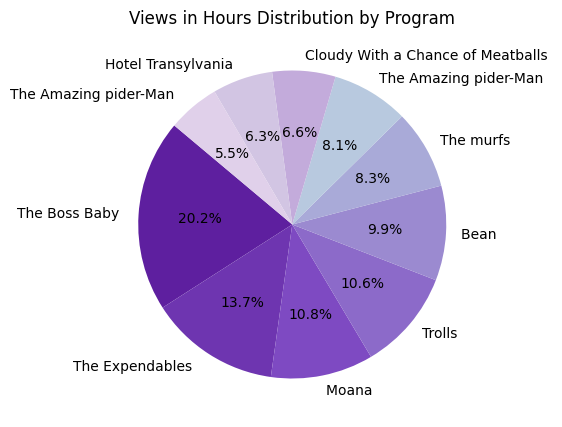

In [ ]:
colors = [
    '#5e1f9f',  # Dark purple
    '#6e35b0',  # Medium-dark purple
    '#7e4ac2',  # Medium purple
    '#8c6ac9',  # Light-medium purple
    '#9b8ad0',  # Light purple
    '#a9aad8',  # Lighter purple
    '#b8c9df',  # Lightest purple
    '#c3abdb',  # Very light purple
    '#d2c5e3',  # Pale purple
    '#e0d0ea'   # Pale lavender
]

# Create the plot with a transparent background
fig, ax = plt.subplots(figsize=(5, 5))
fig.patch.set_facecolor('none')  # Make the figure background transparent
ax.patch.set_facecolor('none')   # Make the axes background transparent

# Plot the pie chart with the purple color scheme
ax.pie(top10['views_in_hours'], labels=top10['program_name'], autopct='%1.1f%%', startangle=140, colors=colors)

# Set the chart title
ax.set_title('Views in Hours Distribution by Program')

# Show the plot
plt.show()


## 6- Relation between HD & SD


In [ ]:
# HDSD Relation - TOTAL
hd_sd = stc.groupby(['hd']).agg({'user_id_maped': [('#user','nunique'),('total_user','count')],'duration_seconds': [('views_in_sec', 'sum')]}).reset_index()
hd_sd.columns = ['hd', '#user', 'total_user', 'views_in_sec']
hd_sd['views_in_hours'] = (hd_sd['views_in_sec']/3600).round(2)
hd_sd = hd_sd.drop(columns='views_in_sec')
hd_sd

,hd,#user,total_user,views_in_hours
0,0,6728,643539,268364.37
1,1,11000,405036,90177.56


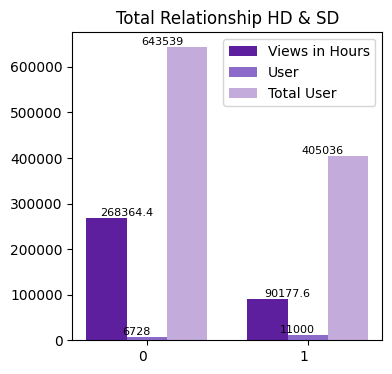

In [ ]:
# Define the positions for the groups of bars
bar_width = 0.25
index = np.arange(len(hd_sd['hd']))

# Create the plot with a transparent background
fig, ax1 = plt.subplots(figsize=(4, 4))
fig.patch.set_facecolor('none')
ax1.patch.set_facecolor('none')

# Plot each bar group with the purple color scheme
bars1 = ax1.bar(index, hd_sd['views_in_hours'], bar_width, label='Views in Hours', color='#5e1f9f')  # Dark purple
bars2 = ax1.bar(index + bar_width, hd_sd['#user'], bar_width, label='User', color='#8c6ac9')         # Medium purple
bars3 = ax1.bar(index + 2 * bar_width, hd_sd['total_user'], bar_width, label='Total User', color='#c3abdb')  # Light purple

# Set the chart title
ax1.set_title('Total Relationship HD & SD')

# Set the x-ticks and labels
ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(hd_sd['hd'], ha='right')

# Adding legend
ax1.legend()

# Get bar heights using bounding boxes
views_heights = [rect.get_height() for rect in bars1.patches]
user_heights = [rect.get_height() for rect in bars2.patches]
total_user_heights = [rect.get_height() for rect in bars3.patches]

# Add text labels above each bar with corresponding y-axis values
for i, (v, u, t) in enumerate(zip(views_heights, user_heights, total_user_heights)):
  ax1.text(index[i] + bar_width/2, v + 0.1, f"{v:.1f}", ha='center', va='bottom', fontsize=8)  # Adjust offset and font size as needed
  ax1.text(index[i] + 1.5*bar_width/2, u + 0.1, f"{u:.0f}", ha='center', va='bottom', fontsize=8)
  ax1.text(index[i] + 2.75*bar_width/2, t + 0.1, f"{t:.0f}", ha='center', va='bottom', fontsize=8)

# Show the plot
plt.show()


In [ ]:
stc_movies = stc[stc['program_class'] == 'MOVIE']
stc_series = stc[stc['program_class'] == 'SERIES/EPISODES']

In [ ]:
# HDSD Relation - Movies only
HDSD_movies = stc_movies.groupby(['hd']).agg({'user_id_maped': [('#user','nunique'),('total_user','count')],'duration_seconds': [('views_in_sec', 'sum')]}).reset_index()
HDSD_movies.columns = ['hd', '#user', 'total_user', 'views_in_sec']
HDSD_movies['views_in_hours'] = (HDSD_movies['views_in_sec']/3600).round(2)
HDSD_movies = HDSD_movies.drop(columns='views_in_sec')
HDSD_movies

,hd,#user,total_user,views_in_hours
0,0,6093,156655,38587.78
1,1,10880,331746,64856.37


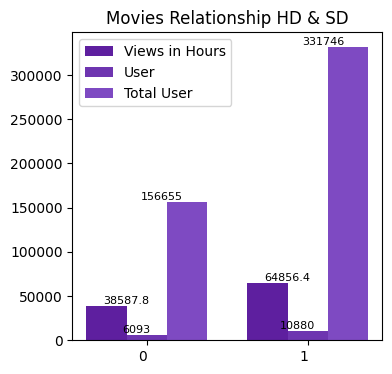

In [ ]:
# Define the colors in a purple-themed gradient
colors = ['#5e1f9f', '#6e35b0', '#7e4ac2']

# Define the positions for the groups of bars
bar_width = 0.25
index = np.arange(len(HDSD_movies['hd']))

# Create the plot with a transparent background
fig, ax1 = plt.subplots(figsize=(4, 4))
fig.patch.set_facecolor('none')  # Make the figure background transparent
ax1.patch.set_facecolor('none')  # Make the axes background transparent

# Plot each bar group with the purple-themed colors
bars1 = ax1.bar(index, HDSD_movies['views_in_hours'], bar_width, label='Views in Hours', color=colors[0])
bars2 = ax1.bar(index + bar_width, HDSD_movies['#user'], bar_width, label='User', color=colors[1])
bars3 = ax1.bar(index + 2 * bar_width, HDSD_movies['total_user'], bar_width, label='Total User', color=colors[2])

# Set the title
ax1.set_title('Movies Relationship HD & SD')

# Set the x-ticks and labels
ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(HDSD_movies['hd'], ha='right')

# Adding legend
ax1.legend()

# Get bar heights using bounding boxes
views_heights = [rect.get_height() for rect in bars1.patches]
user_heights = [rect.get_height() for rect in bars2.patches]
total_user_heights = [rect.get_height() for rect in bars3.patches]

# Add text labels above each bar with corresponding y-axis values
for i, (v, u, t) in enumerate(zip(views_heights, user_heights, total_user_heights)):
    ax1.text(index[i] + bar_width/2, v + 0.1, f"{v:.1f}", ha='center', va='bottom', fontsize=8)  # Adjust offset and font size as needed
    ax1.text(index[i] + 1.5 * bar_width/2, u + 0.1, f"{u:.0f}", ha='center', va='bottom', fontsize=8)
    ax1.text(index[i] + 2.75 * bar_width/2, t + 0.1, f"{t:.0f}", ha='center', va='bottom', fontsize=8)

# Show the plot
plt.show()


In [ ]:
# HDSD Relation - series only
HDSD_series = stc_series.groupby(['hd']).agg({'user_id_maped': [('#user','nunique'),('total_user','count')],'duration_seconds': [('views_in_sec', 'sum')]}).reset_index()
HDSD_series.columns = ['hd', '#user', 'total_user', 'views_in_sec']
HDSD_series['views_in_hours'] = (HDSD_series['views_in_sec']/3600).round(2)
HDSD_series = HDSD_series.drop(columns='views_in_sec')
HDSD_series

,hd,#user,total_user,views_in_hours
0,0,3282,486884,229776.59
1,1,2625,73290,25321.19


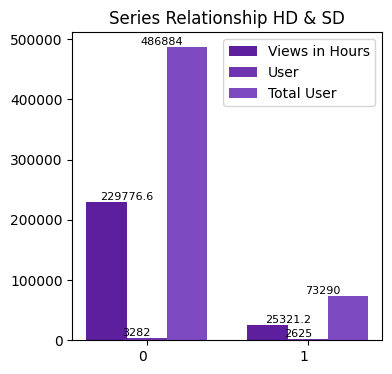

In [ ]:
# Define the colors in a purple-themed gradient
colors = ['#5e1f9f', '#6e35b0', '#7e4ac2']

# Define the positions for the groups of bars
bar_width = 0.25
index = np.arange(len(HDSD_series['hd']))

# Create the plot with a transparent background
fig, ax1 = plt.subplots(figsize=(4, 4))
fig.patch.set_facecolor('none')  # Make the figure background transparent
ax1.patch.set_facecolor('none')  # Make the axes background transparent

# Plot each bar group with the purple-themed colors
bars1 = ax1.bar(index, HDSD_series['views_in_hours'], bar_width, label='Views in Hours', color=colors[0])
bars2 = ax1.bar(index + bar_width, HDSD_series['#user'], bar_width, label='User', color=colors[1])
bars3 = ax1.bar(index + 2 * bar_width, HDSD_series['total_user'], bar_width, label='Total User', color=colors[2])

# Set the title
ax1.set_title('Series Relationship HD & SD')

# Set the x-ticks and labels
ax1.set_xticks(index + bar_width)
ax1.set_xticklabels(HDSD_series['hd'], ha='right')

# Adding legend
ax1.legend()

# Get bar heights using bounding boxes
views_heights = [rect.get_height() for rect in bars1.patches]
user_heights = [rect.get_height() for rect in bars2.patches]
total_user_heights = [rect.get_height() for rect in bars3.patches]

# Add text labels above each bar with corresponding y-axis values
for i, (v, u, t) in enumerate(zip(views_heights, user_heights, total_user_heights)):
    ax1.text(index[i] + bar_width/2, v + 0.1, f"{v:.1f}", ha='center', va='bottom', fontsize=8)  # Adjust offset and font size as needed
    ax1.text(index[i] + 1.5 * bar_width/2, u + 0.1, f"{u:.0f}", ha='center', va='bottom', fontsize=8)
    ax1.text(index[i] + 2.75 * bar_width/2, t + 0.1, f"{t:.0f}", ha='center', va='bottom', fontsize=8)

# Show the plot
plt.show()
